In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean,mode,median,stdev
df=pd.read_csv('retail_sales_dataset.csv')


In [44]:
df


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [42]:
print(df['Product Category'])


0           Beauty
1         Clothing
2      Electronics
3         Clothing
4           Beauty
          ...     
995       Clothing
996         Beauty
997         Beauty
998    Electronics
999    Electronics
Name: Product Category, Length: 1000, dtype: object


In [26]:
df.dropna()
df.dropna(axis=1)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [35]:
df.drop_duplicates(inplace=True)

In [32]:
df.describe()


,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [33]:
mean = df.mean(numeric_only=True)
print("mean", mean)


mean Transaction ID    500.500
Age                41.392
Quantity            2.514
Price per Unit    179.890
Total Amount      456.000
dtype: float64


In [37]:
mode=df.mode(numeric_only=True)
print("mode",mode)

mode      Transaction ID   Age  Quantity  Price per Unit  Total Amount
0                 1  43.0       4.0            50.0          50.0
1                 2  64.0       NaN             NaN           NaN
2                 3   NaN       NaN             NaN           NaN
3                 4   NaN       NaN             NaN           NaN
4                 5   NaN       NaN             NaN           NaN
..              ...   ...       ...             ...           ...
995             996   NaN       NaN             NaN           NaN
996             997   NaN       NaN             NaN           NaN
997             998   NaN       NaN             NaN           NaN
998             999   NaN       NaN             NaN           NaN
999            1000   NaN       NaN             NaN           NaN

[1000 rows x 5 columns]


In [25]:
std_dev = df.std(numeric_only=True)
print("Standard Deviation:\n", std_dev)

Standard Deviation:
 Transaction ID    288.819436
Age                13.681430
Quantity            1.132734
Price per Unit    189.681356
Total Amount      559.997632
dtype: float64


In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [82]:
import pandas as pd

# Load the dataset
df = pd.read_csv('retail_sales_dataset.csv')

# Check columns and remove duplicates
print(df.columns[df.columns.duplicated()])
df = df.loc[:, ~df.columns.duplicated()]

# Clean and check Date column
print(df['Date'].head())
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])

# Set the Date column as index
df.set_index('Date', inplace=True)

#Confirm the Date column is datetime
print(df.index)
print(df.dtypes)


Index([], dtype='object')
0    2023-11-24
1    2023-02-27
2    2023-01-13
3    2023-05-21
4    2023-05-06
Name: Date, dtype: object
DatetimeIndex(['2023-11-24', '2023-02-27', '2023-01-13', '2023-05-21',
               '2023-05-06', '2023-04-25', '2023-03-13', '2023-02-22',
               '2023-12-13', '2023-10-07',
               ...
               '2023-12-26', '2023-08-21', '2023-02-06', '2023-12-18',
               '2023-04-30', '2023-05-16', '2023-11-17', '2023-10-29',
               '2023-12-05', '2023-04-12'],
              dtype='datetime64[ns]', name='Date', length=1000, freq=None)
Transaction ID       int64
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object


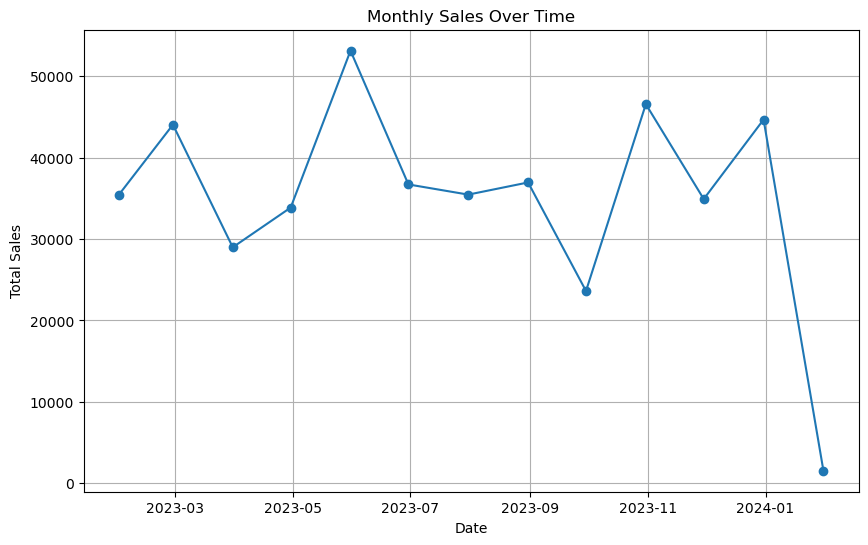

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales, marker='o')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


In [89]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(monthly_sales.dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If the p-value is less than 0.05, the series is stationary


ADF Statistic: -3.6702088100655894
p-value: 0.0045522517976560725


In [90]:
model = ARIMA(monthly_sales, order=(1, 1, 1))  # (p, d, q) where p=AR order, d=differencing, q=MA order
arima_result = model.fit()

# Print the summary of the model
print(arima_result.summary())


                               SARIMAX Results                                
Dep. Variable:           Total Amount   No. Observations:                   13
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -132.800
Date:                Sun, 25 Aug 2024   AIC                            271.599
Time:                        12:50:07   BIC                            273.054
Sample:                    01-31-2023   HQIC                           271.061
                         - 01-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0663      0.563     -0.118      0.906      -1.170       1.038
ma.L1         -0.9666      0.404     -2.391      0.017      -1.759      -0.174
sigma2      2.209e+08   1.77e-09   1.25e+17      0.0

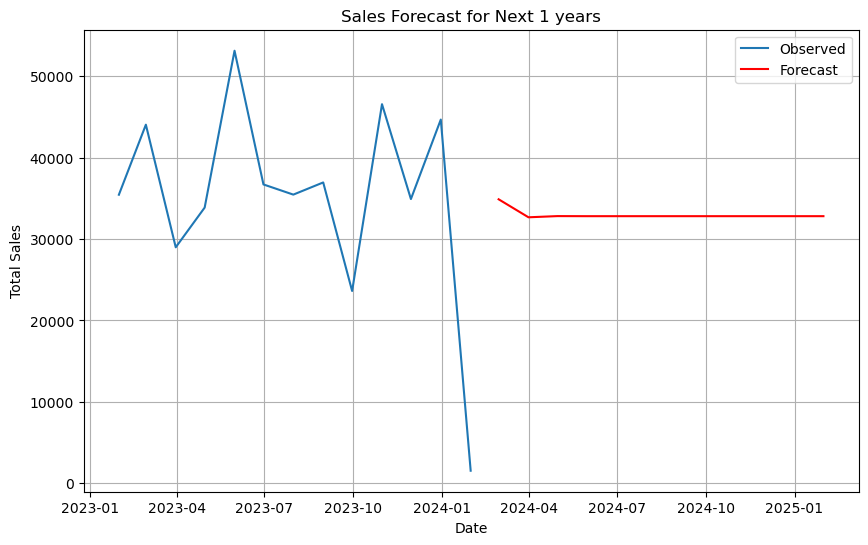

In [110]:
forecast = arima_result.forecast(steps=12)  # Forecast the next 12 months
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales, label='Observed')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Sales Forecast for Next 1 years')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()


In [109]:
from sklearn.metrics import mean_squared_error

# Calculate the RMSE
rmse = mean_squared_error(monthly_sales[-12:], forecast, squared=False)
print(f'RMSE: {rmse}')


RMSE: 12747.361792928179


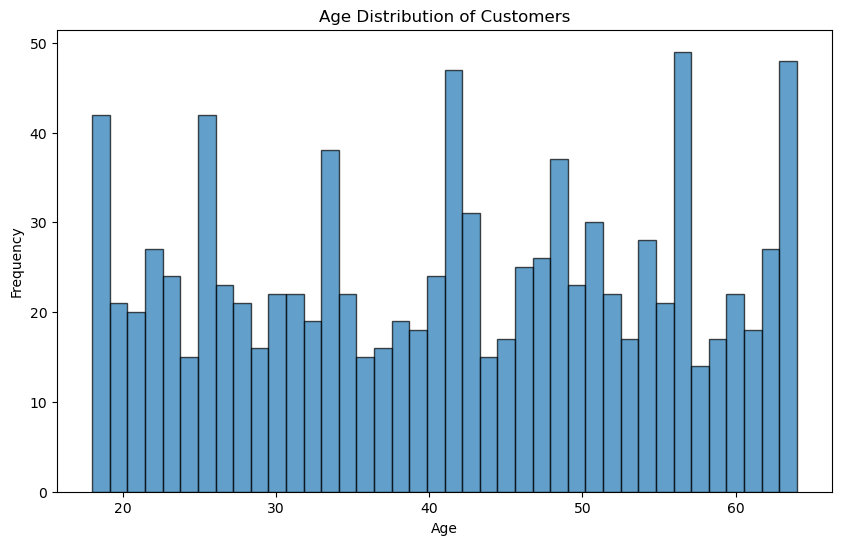

In [120]:
# Convert Age column to numeric
df['Age'] = pd.to_numeric(df['Age'])
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=40, edgecolor='k', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Customers')
plt.show()


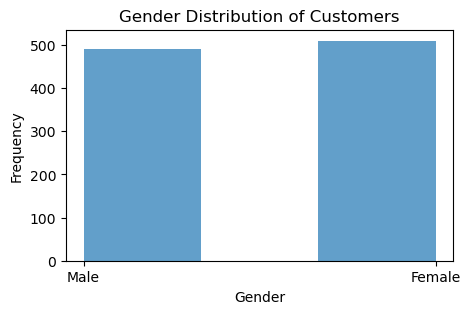

In [132]:
plt.figure(figsize=(5, 3))
plt.hist(df['Gender'],bins=3, alpha=0.7)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender Distribution of Customers')
plt.show()


In [ ]:
Purchasing Behavior:
Total Purchase Amount: Calculate total spending per customer.
Average Purchase Value: Determine the average purchase amount per transaction.

In [135]:
total_spending_per_customer=df.groupby('Customer ID')['Total Amount'].sum().reset_index()

In [137]:
print(total_spending_per_customer.head(20))

   Customer ID  Total Amount
0      CUST001           150
1      CUST002          1000
2      CUST003            30
3      CUST004           500
4      CUST005           100
5      CUST006            30
6      CUST007            50
7      CUST008           100
8      CUST009           600
9      CUST010           200
10     CUST011           100
11     CUST012            75
12     CUST013          1500
13     CUST014           120
14     CUST015          2000
15     CUST016          1500
16     CUST017           100
17     CUST018            50
18     CUST019            50
19     CUST020           900


In [142]:
df['Purchase Value'] = df['Price per Unit'] * df['Quantity']

# Calculate the average purchase value
average_purchase_value = df['Purchase Value'].mean()

print(f'Average Purchase Value: {average_purchase_value:.3f}')

Average Purchase Value: 456.000


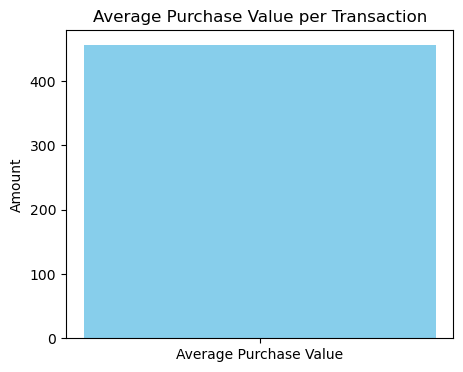

In [150]:
plt.figure(figsize=(5, 4))
plt.bar(['Average Purchase Value'], [average_purchase_value], color='skyblue')
plt.ylabel('Amount')
plt.title('Average Purchase Value per Transaction')
plt.show()


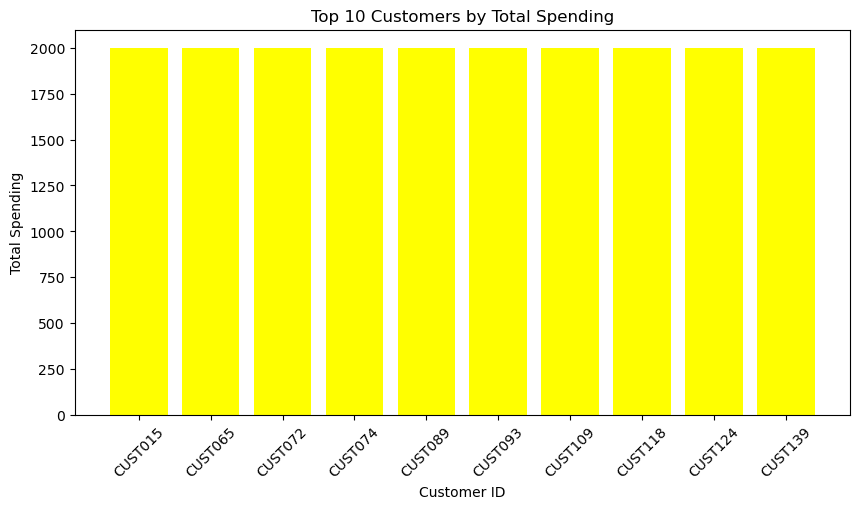

In [165]:
import matplotlib.pyplot as plt

# Plot total spending per customer
plt.figure(figsize=(10, 5))
top_customers = total_spending_per_customer.nlargest(10, 'Total Amount')
plt.bar(top_customers['Customer ID'].astype(str), top_customers['Total Amount'], color=('yellow'))
plt.xlabel('Customer ID')
plt.ylabel('Total Spending')
plt.title('Top 10 Customers by Total Spending')
plt.xticks(rotation=45)
plt.show()


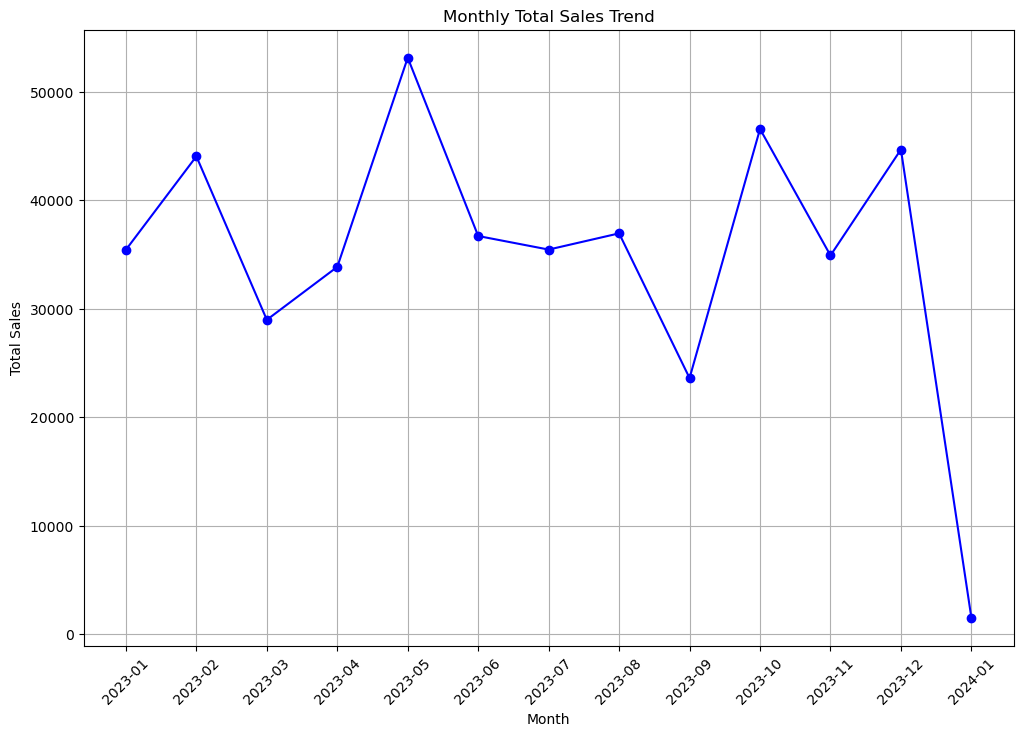

In [162]:

# Plot monthly total sales trend
plt.figure(figsize=(12, 8))
plt.plot(monthly_sales['Month'], monthly_sales['Total Amount'], marker='o', linestyle='-', color='b')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Total Sales Trend')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


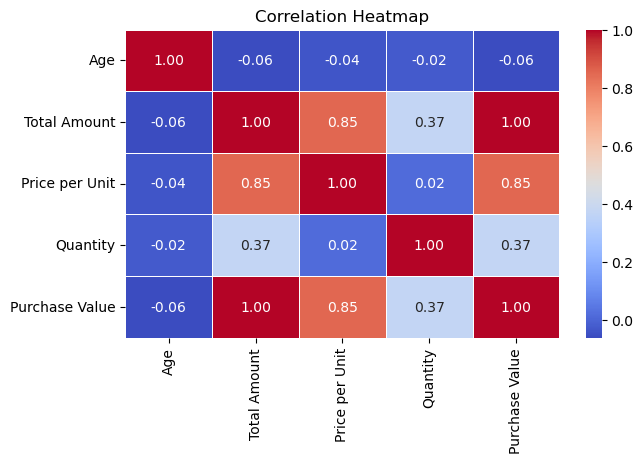

In [168]:

# Calculate correlation matrix
correlation_matrix = df[['Age', 'Total Amount', 'Price per Unit', 'Quantity', 'Purchase Value']].corr()

# Plot heatmap
plt.figure(figsize=(7, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
Recommendations: Provide actionable recommendations based on the EDA.